# Linear Regression With One Variable

In [539]:
#let's start by importing relevant python libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
RESTURANT_PATH = os.path.join("datasets", "resturant")

In [540]:
def load_resturant_data(resturant_path=RESTURANT_PATH): 
    csv_path = os.path.join(resturant_path, "ex1data2.txt") 
    print(csv_path)
    return pd.read_csv(csv_path)

In [541]:
data = load_resturant_data()
data.head()

datasets/resturant/ex1data2.txt


,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [542]:
x = data.drop(['Price'], axis=1)
y = data['Price']
m = len(y)

In [543]:
def featureNormalize(x):
    '''
     This function takes the features as input and
     returns the normalized values, the mean, as well 
     as the standard deviation for each feature.
     '''
    x_norm = (x - np.mean(x))/np.std(x) ##Scalling function
    mu = np.mean(x) ##Define the mena
    sigma = np.std(x) ##Define the standard deviation
    return x_norm, mu, sigma ##return the values

In [544]:
x,mean,std = featureNormalize(x)

/Users/mac/ml/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [545]:
x = np.append(np.ones([m,1]), x, axis=1) ## Append the bias term (field containing all ones) to X.
y = np.array(y).reshape(-1,1) ## reshape y to mx1 array
theta = np.zeros([3,1]) ## Initialize theta (the coefficient) to a 3x1 zero vector.

In [546]:

def computeCostMulti(x, y, theta):
    '''
    This function takes in the X and y matrices as well as the 
    initial theta values(coefficients) and returns the cost(error of             
    prediction)
    '''
    m = len(y) #this is the length of the training set
    h = x.dot(theta) #the hypothesis
    j = 1/(2*m) *(np.sum((h - y)**2)) #the cost function
    return j #return the cost
cost = computeCost(x,y,theta) #Call the function and pass in values for X, y, and theta to compute the cost.
print(cost)

65591548106.45744


In [547]:
def gradientDescentMulti(x, y, theta, alpha, iter):
    '''
    This function takes in the values of the training set, 
    as well the intial theta values(coefficients), the 
    learning rate, and the number of iterations. The output 
    will be the a new set of coefficeients(theta), optimized 
    for making predictions, as well as the array of the cost 
    as it depreciates on each iteration.
    '''
    
    J_history = [] ## Array for storing the cost values on each iteration.
  
    m = len(y) ## Length of the training set
    for i in range(iter): ## Loop for 400 iterations
        h = x.dot(theta) ## The hypothesis
        theta = theta - (alpha/m)*(x.T.dot(h-y)) ## Grad.desc.func.
        J_history.append(computeCostMulti(x, y, theta)) ## Append the cost to the J_history array
    return theta, J_history ## Return the final values of theta and the J_history array
        

In [548]:
iter = 400 ## Initialize the iteration parameter.
alpha = 0.01 ## Initialize the learning rate.
new_theta, J_history = gradientDescentMulti(x, y, theta, alpha, iter)
print (new_theta)

[[334302.06399328]
 [ 99411.44947359]
 [  3267.01285407]]


2105448288.6292474


Text(0.5, 1.0, 'Minimizing Cost Using Gradient Descent')

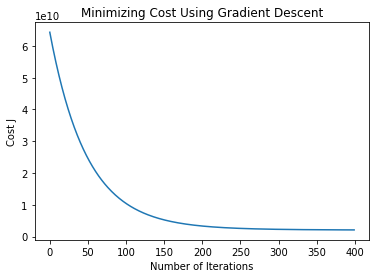

In [549]:
new_cost = computeCostMulti(x,y,new_theta) ## We call the function again, but use the new coefficients.
print(new_cost)
plt.plot(J_history)
plt.ylabel('Cost J')
plt.xlabel('Number of Iterations')
plt.title('Minimizing Cost Using Gradient Descent')

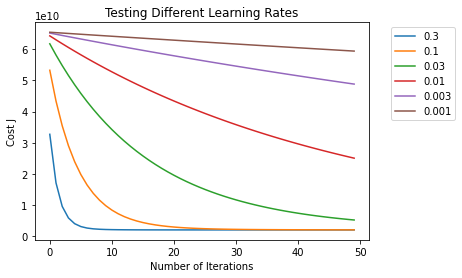

In [550]:


theta_1, J_history_1 = gradientDescentMulti(x, y, theta, 0.3, 50)
theta_2, J_history_2 = gradientDescentMulti(x, y, theta, 0.1, 50)
theta_3, J_history_3 = gradientDescentMulti(x, y, theta, 0.03, 50)
theta_4, J_history_4 = gradientDescentMulti(x, y, theta, 0.01, 50)
theta_5, J_history_5 = gradientDescentMulti(x, y, theta, 0.003, 50)
theta_6, J_history_6 = gradientDescentMulti(x, y, theta, 0.001, 50)

plt.plot(J_history_1, label='0.3')
plt.plot(J_history_2, label='0.1')
plt.plot(J_history_3, label='0.03')
plt.plot(J_history_4, label='0.01')
plt.plot(J_history_5, label='0.003')
plt.plot(J_history_6, label='0.001')
plt.title('Testing Different Learning Rates')
plt.xlabel('Number of Iterations')
plt.ylabel('Cost J')
plt.legend(bbox_to_anchor=(1.05, 1.0))

In [551]:
New Theta with 0.3 learning rate

SyntaxError: invalid syntax. Perhaps you forgot a comma? (2249206358.py, line 1)

In [552]:
theta, J_history = gradientDescentMulti(x, y, theta, 0.3, 1500)
print(theta)

[[340412.65957447]
 [109447.79646964]
 [ -6578.35485416]]


# Prediction

In [553]:
x = [1650, 3]
x = np.array(x) ## convert x to numpy array
x = (x - mean) / std
x = np.append(1, x)
x = np.reshape(x, (1,3)) # reshape x to 1X3 array

In [554]:
def prediction(x, theta):   
    '''
    This function takes in the features of the house 
    as well as the coefficients, and returns the 
    predicted price.
    '''
    print(x)
    print(theta)
    return np.dot(x, theta)

In [555]:
pred = prediction(x, theta)
print(pred)

[[ 1.         -0.44604386 -0.22609337]]
[[340412.65957447]
 [109447.79646964]
 [ -6578.35485416]]
[[293081.4643349]]
